<a href="https://colab.research.google.com/github/tusharmoon/DeepLearning/blob/main/DL_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#!pip install tensorflow

In [1]:
import tensorflow as tf
print(tf.__version__)

2.17.0


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset = pd.read_csv('Churn_Modelling.csv')

In [4]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
## Divide the data set into Dependent and Independent Features

X = dataset.iloc[:,3:13]
y= dataset.iloc[:,13]

In [6]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [7]:
y

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


In [8]:
## Feature engineering --> One hot Encoding
geography = pd.get_dummies(X["Geography"],drop_first = True)
gender = pd.get_dummies(X["Gender"],drop_first = True)

In [9]:
#Dropping the Geography and Gender column from the main Data

X= X.drop(["Geography","Gender"],axis=1)
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [10]:
X = pd.concat([X,geography,gender],axis=1)
X = X.replace({True:1,False:0})
X

<ipython-input-10-e9e15d8caf2b>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X = X.replace({True:1,False:0})


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [11]:
## Splitting the dataset into Train test sets

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)



In [12]:
## Feature scaling
##We only perform feature scaling on the training set because applying
## the scaling transformation based on the test data would introduce information leakage,
## essentially allowing the model to "cheat" by learning from the test set during training,
##which would lead to an overly optimistic evaluation of the model's performance on unseen data;
##therefore, we want to ensure the test set remains completely independent and representative of real-world data

# Avoide Data Lekage as well
##  Data Leakage Prevention:
## By fitting the scaling parameters on the training set only, we avoid inadvertently
## incorporating information from the test set into the model during training
## which could lead to an overly optimistic evaluation of the model's performance.

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [13]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [14]:
X_train.shape

(8000, 11)

# **ANN IMPLEMENTATION **

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [16]:
classifier = Sequential()

In [17]:
## As we have 11 input features i.e in X_train

classifier.add(Dense(units=11,activation='relu'))  #Here Relu will be applied to next layer

In [20]:
## Adding the 1st Hidden layer
# No of Neurons in HIdden layer can be any, But here we are not focusing on the no. of neurons part

classifier.add(Dense(units=7,activation='relu'))

# In hidden layer you can add the dropout layer,
# The line of Code can be added with each line of Hidden layer code
#  ----> classifier.add(Dropout(0.3))


In [21]:
## Adding the 2nd Hidden

classifier.add(Dense(units = 6,activation='relu'))

#with each hidden layer( line of code you have to add the dropout functionality to reduce the "Overfitting")
#  ----> classifier.add(Dropout(0.3))

In [22]:
# Adding the output layer, as this is binary classification problem
# for the activation function , we can leverage the " Sigmoid Activation Function"

classifier.add(Dense(units=1,activation="sigmoid"))

In [23]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

#The above line of code will directily take the learning rate as 0.01 , otherwise if you want to
# do it specefically, you can use the following lines specificaly.

##  import tensorflow
##  opt = tensorflow.keras.optimizers.Adam(learning_rate=0.001)

In [24]:
## Early Stopping
## We add early stopping so thet after some epochs, when the accuracy does not changes or it stabilize this
## will stop the flow, rather than going for entire epochs intervals


import tensorflow as tf

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=0,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [25]:
# A validation split in deep learning is a process of dividing a dataset into three subsets:
# training, testing, and validation. The validation set is used to evaluate the model's performance during training,
# which helps to prevent overfitting and improve the model's generalization to new data.

model_history = classifier.fit(X_train,y_train,validation_split = 0.33, batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7587 - loss: 0.5572 - val_accuracy: 0.8035 - val_loss: 0.4511
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7967 - loss: 0.4524 - val_accuracy: 0.8164 - val_loss: 0.4235
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8258 - loss: 0.4000 - val_accuracy: 0.8307 - val_loss: 0.3963
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8347 - loss: 0.3897 - val_accuracy: 0.8379 - val_loss: 0.3832
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8415 - loss: 0.3685 - val_accuracy: 0.8421 - val_loss: 0.3736
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8402 - loss: 0.3659 - val_accuracy: 0.8436 - val_loss: 0.3743


In [26]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

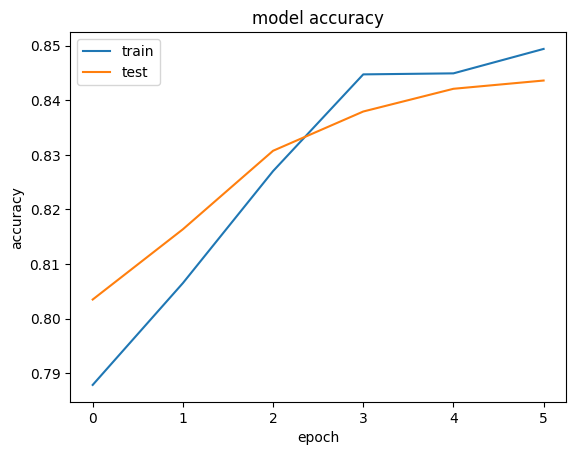

In [28]:
# prompt: plot the chart with model_history

plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


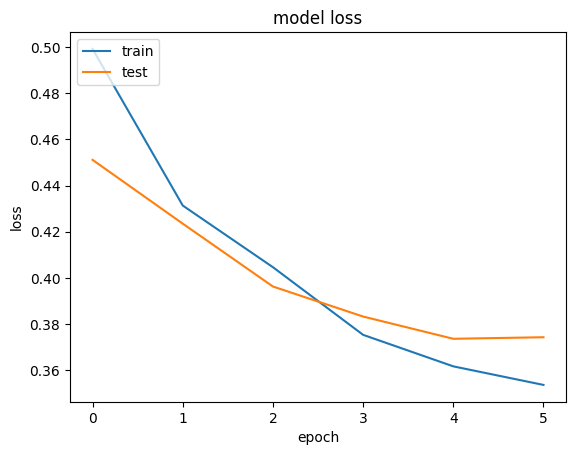

In [29]:

# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [30]:
# Perdiction for the test data

y_pred = classifier.predict(X_test)
y_pred

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[0.18274978],
       [0.4166365 ],
       [0.1259511 ],
       ...,
       [0.11130083],
       [0.15729235],
       [0.1582415 ]], dtype=float32)

In [31]:
# we are doing like this because this is binary classification problem, and in
# sigmodi function if value is >= 0.5 we consider as 1, otherwise it is zero
# therefore the below step

y_pred = (y_pred >=0.5)
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [32]:
# make the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[1551,   44],
       [ 243,  162]])

In [34]:
#Calculate the accuracy

from sklearn.metrics import accuracy_score
score = accuracy_score(y_test,y_pred)
score

0.8565

In [35]:
# Now if you want to check the weights values

classifier.get_weights()

[array([[ 0.11602471, -0.06433714, -0.10675734, -0.2712603 , -0.13738945,
          0.26294994, -0.29696012,  0.42395064,  0.18040037,  0.02580747,
          0.18847983],
        [-0.20620291,  0.18095821, -0.48368573, -0.17352   , -0.35132396,
         -0.10708243, -0.5735262 , -0.7573153 , -0.3781618 , -0.88847154,
          0.2592545 ],
        [ 0.17488493,  0.53754246, -0.40516677,  0.4613056 ,  0.29836273,
          0.04868241,  0.25654536, -0.0148894 , -0.31615594,  0.04536939,
         -0.15012354],
        [-0.5133644 , -0.4548341 , -0.14732935, -0.6192182 ,  0.43729308,
         -0.05775128,  0.12802045,  0.39281544, -0.24781775,  0.03699974,
         -0.40807256],
        [ 0.0565214 ,  0.39168888, -0.17030261, -0.6904716 , -0.08747125,
          0.88456154,  0.5065559 , -0.26577884,  0.28179905, -0.01893951,
         -0.6292693 ],
        [ 0.20050304,  0.5200223 , -0.2528165 , -0.15072165, -0.13909401,
          0.23272175, -0.13054587,  0.54076636,  0.38043198, -0.3201522